# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [1]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


#### compile and fit model 

In [6]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 39s 13ms/step - loss: 0.4550 - accuracy: 0.8563 - val_loss: 0.0664 - val_accuracy: 0.9812
Epoch 2/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0573 - accuracy: 0.9817 - val_loss: 0.0614 - val_accuracy: 0.9808
Epoch 3/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 0.0517 - val_accuracy: 0.9859
Epoch 4/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0268 - accuracy: 0.9913 - val_loss: 0.0453 - val_accuracy: 0.9865
Epoch 5/5
750/750 [==============================] - 9s 12ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0405 - val_accuracy: 0.9897


#### evaluate model

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 4ms/step - loss: 0.0286 - accuracy: 0.9916


0.991599977016449

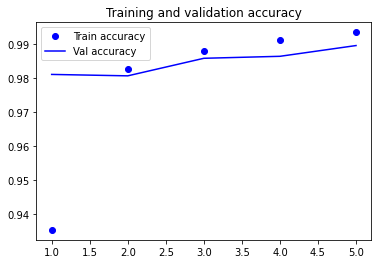

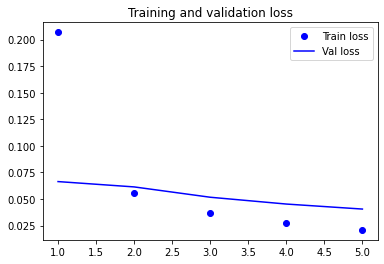

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Train accuracy')
plt.plot(epochs, val_acc, 'b', label='Val accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Train loss')
plt.plot(epochs, val_loss, 'b', label='Val loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [9]:
# Write code here
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(optimizer='rmsprop', activation='relu'):
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation=activation, input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation=activation))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation=activation))
  model.add(layers.Dense(10, activation='softmax'))
  model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [10]:
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=64, verbose=1)

optimizer = ['SGD', 'RMSprop','Adam']
activation = ['relu', 'tanh']
param_grid = dict(optimizer=optimizer, activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=1)
grid_search_output = grid.fit(train_images, train_labels)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 11.7min finished


Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.4257 - accuracy: 0.8664
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0622 - accuracy: 0.9817
Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0392 - accuracy: 0.9874
Epoch 4/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0282 - accuracy: 0.9912
Epoch 5/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0200 - accuracy: 0.9940
Epoch 6/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0194 - accuracy: 0.9932
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0144 - accuracy: 0.9958
Epoch 8/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0116 - accuracy: 0.9964
Epoch 9/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0110 - accuracy: 0.9969
Epoch 10/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0103 - accuracy: 0.9965

In [11]:
print("Best: %f using %s" % (grid_search_output.best_score_, grid_search_output.best_params_))

Best: 0.989433 using {'activation': 'relu', 'optimizer': 'Adam'}


In [12]:
means = grid_search_output.cv_results_['mean_test_score']
stds = grid_search_output.cv_results_['std_test_score']
params = grid_search_output.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.974317 (0.001709) with: {'activation': 'relu', 'optimizer': 'SGD'}
0.987683 (0.000366) with: {'activation': 'relu', 'optimizer': 'RMSprop'}
0.989433 (0.000470) with: {'activation': 'relu', 'optimizer': 'Adam'}
0.973550 (0.000414) with: {'activation': 'tanh', 'optimizer': 'SGD'}
0.988533 (0.000517) with: {'activation': 'tanh', 'optimizer': 'RMSprop'}
0.986350 (0.001290) with: {'activation': 'tanh', 'optimizer': 'Adam'}


In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', 
            loss='categorical_crossentropy',
            metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [14]:
model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 9s 11ms/step - loss: 0.4544 - accuracy: 0.8595 - val_loss: 0.0578 - val_accuracy: 0.9829
Epoch 2/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0557 - accuracy: 0.9830 - val_loss: 0.0602 - val_accuracy: 0.9826
Epoch 3/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0358 - accuracy: 0.9881 - val_loss: 0.0433 - val_accuracy: 0.9881
Epoch 4/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0254 - accuracy: 0.9924 - val_loss: 0.0455 - val_accuracy: 0.9873
Epoch 5/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0208 - accuracy: 0.9935 - val_loss: 0.0400 - val_accuracy: 0.9888
Epoch 6/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0352 - val_accuracy: 0.9910
Epoch 7/10
750/750 [==============================] - 9s 12ms/step - loss: 0.0125 - accuracy: 0.9960 - val_loss: 0.0394 - val_accuracy: 0.9909

In [15]:
import pandas as pd

hdf = pd.DataFrame(model.history.history)

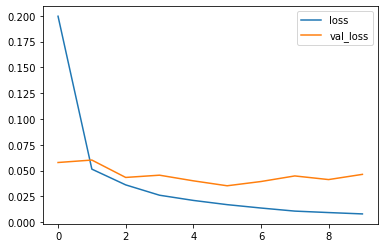

In [16]:
hdf[['loss','val_loss']].plot()

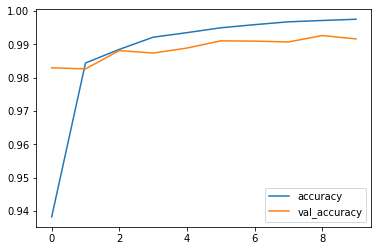

In [17]:
hdf[['accuracy','val_accuracy']].plot()